In [2]:
from tensorflow import keras as ks
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
# Read data and get relevant statistics for numerical values
EDA_data = pd.read_csv('Demo_and_EDA_model_code/with_income.csv')
EDA_data.describe()

,price,year,odometer,posting_date,income_this_year
count,8.630900e+04,86309.000000,8.630900e+04,86309.0,85786.000000
mean,1.183463e+05,2007.813403,1.256997e+05,2021.0,65868.049134
std,1.839753e+07,11.123597,2.587053e+05,0.0,13139.164673
min,0.000000e+00,1900.000000,0.000000e+00,2021.0,45881.000000
25%,4.950000e+03,2005.000000,7.224500e+04,2021.0,56494.000000
50%,9.000000e+03,2010.000000,1.134520e+05,2021.0,62270.000000
75%,1.790000e+04,2014.000000,1.559700e+05,2021.0,76614.000000
max,3.736929e+09,2022.000000,1.000000e+07,2021.0,96477.000000


Exploratory Data Analysis 

In [4]:
# Correlation matrix visualization
corr = EDA_data[['region','price','year','manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', \
                'transmission', 'drive', 'size', 'type', 'paint_color', 'state', 'income_this_year']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/m2/26ngfwv12216gvn6wdpm1kw00000gn/T/ipykernel_77596/3857411707.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'transmission', 'drive', 'size', 'type', 'paint_color', 'state', 'income_this_year']].corr()
/var/folders/m2/26ngfwv12216gvn6wdpm1kw00000gn/T/ipykernel_77596/3857411707.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,price,year,odometer,income_this_year
price,1.00,-0.00,0.00,-0.00
year,-0.00,1.00,-0.08,-0.00
odometer,0.00,-0.08,1.00,-0.02
income_this_year,-0.00,-0.00,-0.02,1.00


Histograms of different variables to get our skew results 

count        86309
unique         404
top       columbus
freq          1116
Name: region, dtype: object


Text(0.5, 1.0, 'Top 30 Cities in Dataset')

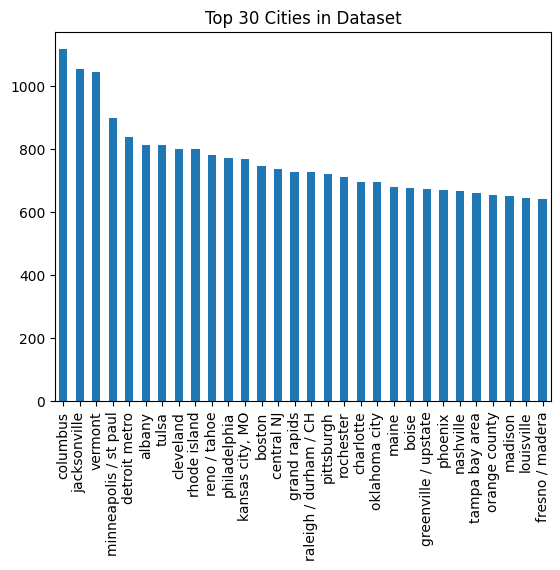

In [62]:
# Cities in Dataset
print(EDA_data.region.describe())
EDA_data['region'].value_counts().sort_values(ascending=0)[:30].plot(kind='bar')
plt.title("Top 30 Cities in Dataset")

count    86309.000000
mean      2007.813403
std         11.123597
min       1900.000000
25%       2005.000000
50%       2010.000000
75%       2014.000000
max       2022.000000
Name: year, dtype: float64


/var/folders/m2/26ngfwv12216gvn6wdpm1kw00000gn/T/ipykernel_66053/2528478577.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  EDA_data['year'].value_counts().sort_values(ascending=0)[:30].plot(kind='bar')


Text(0.5, 1.0, 'Top 30 Years in Dataset')

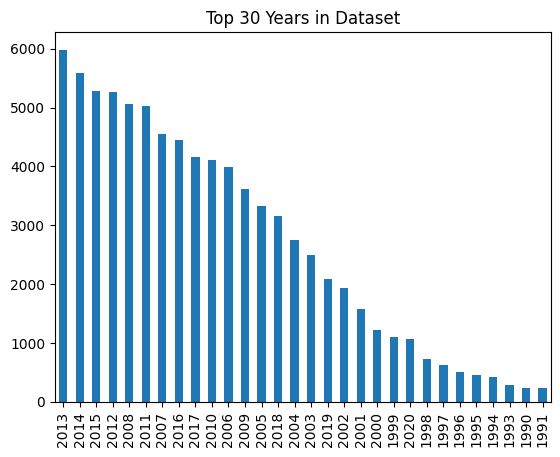

In [67]:
# Car Years in Dataset
print(EDA_data.year.describe())
EDA_data['year'].value_counts().sort_values(ascending=0)[:30].plot(kind='bar')
plt.title("Top 30 Years in Dataset")

count     82120
unique       41
top        ford
freq      16112
Name: manufacturer, dtype: object


Text(0.5, 1.0, 'Top 30 Manufacturers in Dataset')

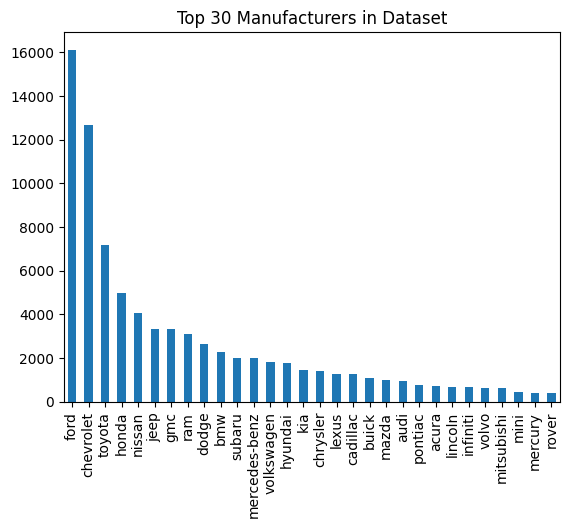

In [69]:
# Manufacturers (Brands) in Dataset
print(EDA_data.manufacturer.describe())
EDA_data['manufacturer'].value_counts().sort_values(ascending=0)[:30].plot(kind='bar')
plt.title("Top 30 Manufacturers in Dataset")

count     85288
unique    11931
top       f-150
freq       1681
Name: model, dtype: object


Text(0.5, 1.0, 'Top 30 Common Models in Dataset')

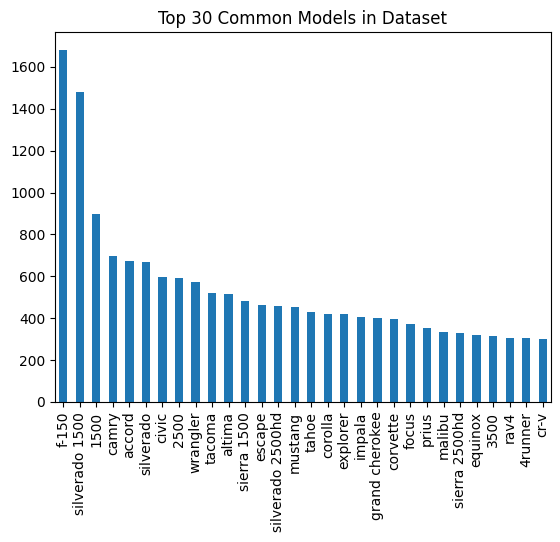

In [142]:
# Models in Dataset
print(EDA_data.model.describe())
EDA_data['model'].value_counts().sort_values(ascending=0)[:30].plot(kind='bar')
plt.title("Top 30 Common Models in Dataset")

count         86309
unique            6
top       excellent
freq          42547
Name: condition, dtype: object


Text(0.5, 1.0, 'Conditions in Dataset')

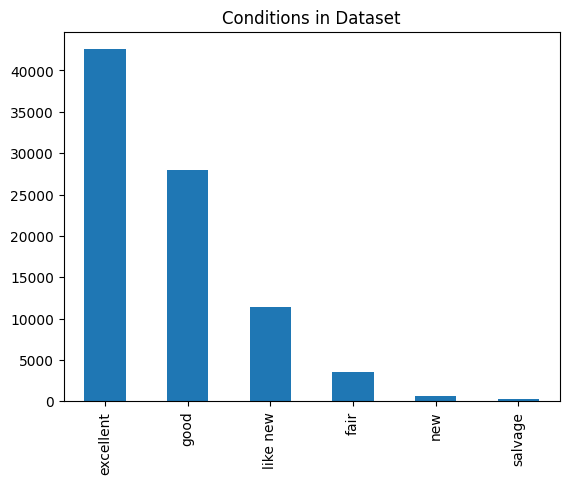

In [71]:
# Condition of Cars in Dataset
print(EDA_data.condition.describe())
EDA_data['condition'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Conditions in Dataset")

count           86309
unique              8
top       6 cylinders
freq            29290
Name: cylinders, dtype: object


Text(0.5, 1.0, 'Cylinder Counts in Dataset')

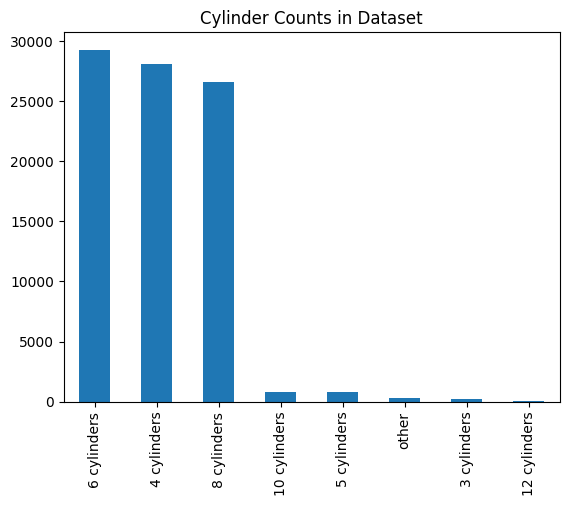

In [74]:
# Cylinder Counts in Dataset
print(EDA_data.cylinders.describe())
EDA_data['cylinders'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Cylinder Counts in Dataset")

count     86309
unique        5
top         gas
freq      78317
Name: fuel, dtype: object


Text(0.5, 1.0, 'Fuel Types in Dataset')

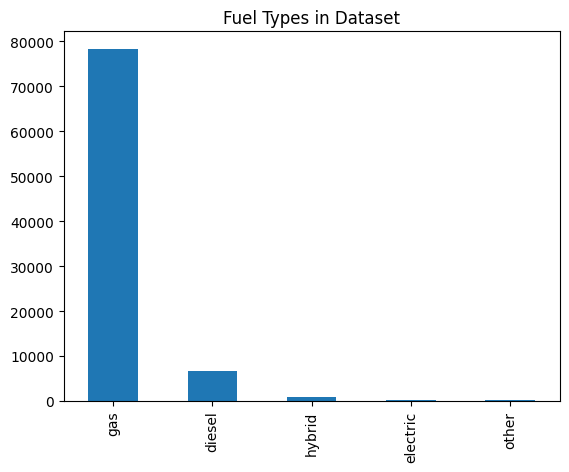

In [76]:
# Fuel Types in Dataset
print(EDA_data.fuel.describe())
EDA_data['fuel'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Fuel Types in Dataset")

count    8.630900e+04
mean     1.256997e+05
std      2.587053e+05
min      0.000000e+00
25%      7.224500e+04
50%      1.134520e+05
75%      1.559700e+05
max      1.000000e+07
Name: odometer, dtype: float64


/var/folders/m2/26ngfwv12216gvn6wdpm1kw00000gn/T/ipykernel_66053/4071795042.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  EDA_data['odometer'].value_counts().sort_values(ascending=0)[:30].plot(kind='bar')


Text(0.5, 1.0, 'Top 30 Odomoeter Readings in Dataset')

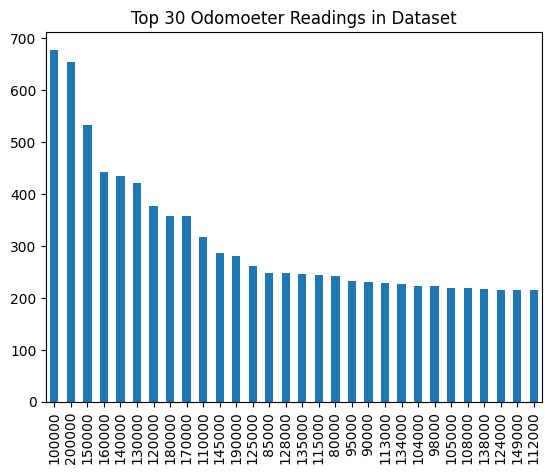

In [78]:
# Odomoter (Number of Miles) Readings in Dataset
print(EDA_data.odometer.describe())
EDA_data['odometer'].value_counts().sort_values(ascending=0)[:30].plot(kind='bar')
plt.title("Top 30 Odomoeter Readings in Dataset")

count         86298
unique            3
top       automatic
freq          78271
Name: transmission, dtype: object


Text(0.5, 1.0, 'Transmission Types in Dataset')

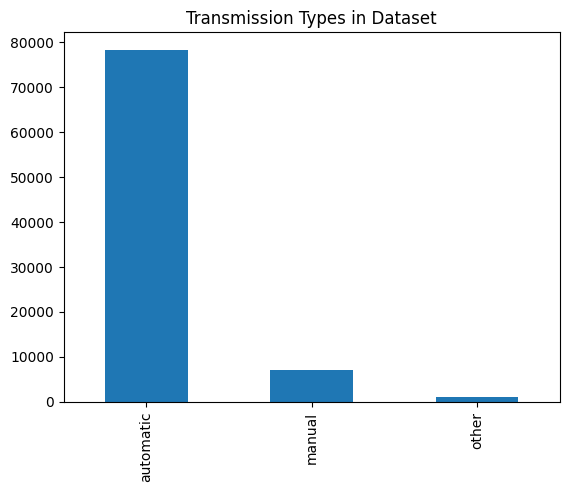

In [80]:
# Transmission Types in Dataset
print(EDA_data.transmission.describe())
EDA_data['transmission'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Transmission Types in Dataset")

count     86309
unique        3
top         4wd
freq      35394
Name: drive, dtype: object


Text(0.5, 1.0, 'Drive Types in Dataset')

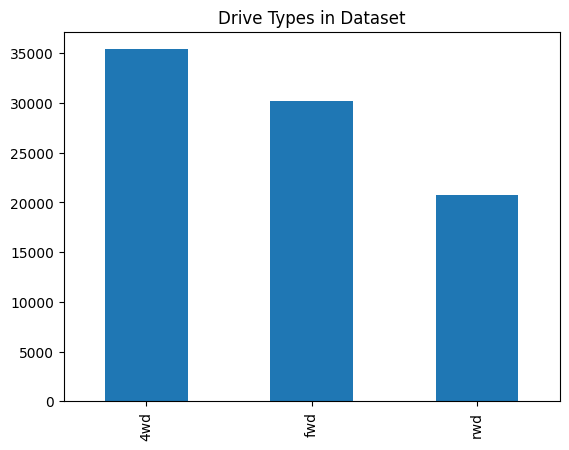

In [82]:
# Drive Types in Dataset
print(EDA_data.drive.describe())
EDA_data['drive'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Drive Types in Dataset")

count         86309
unique            4
top       full-size
freq          48218
Name: size, dtype: object


Text(0.5, 1.0, 'Sizes in Dataset')

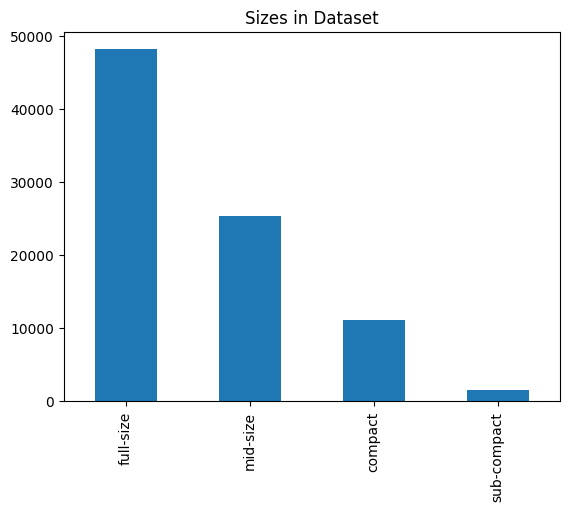

In [85]:
# Car Sizes in Dataset
print(EDA_data['size'].describe())
EDA_data['size'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Sizes in Dataset")

count     84240
unique       13
top       sedan
freq      22741
Name: type, dtype: object


Text(0.5, 1.0, 'Car Types in Dataset')

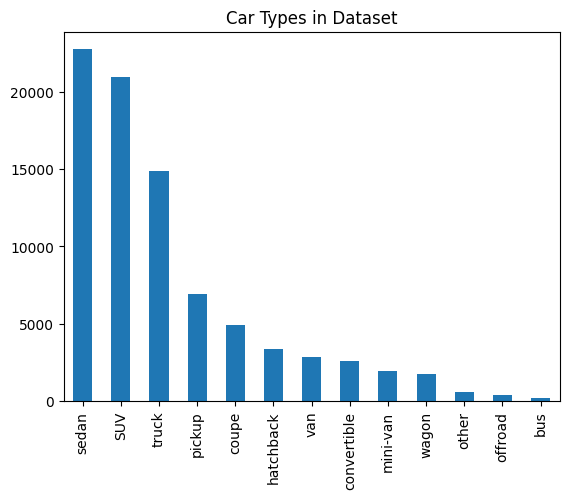

In [87]:
# Car Types in Dataset
print(EDA_data.type.describe())
EDA_data['type'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Car Types in Dataset")

count     86309
unique       12
top       white
freq      21591
Name: paint_color, dtype: object


Text(0.5, 1.0, 'Paint Colors in Dataset')

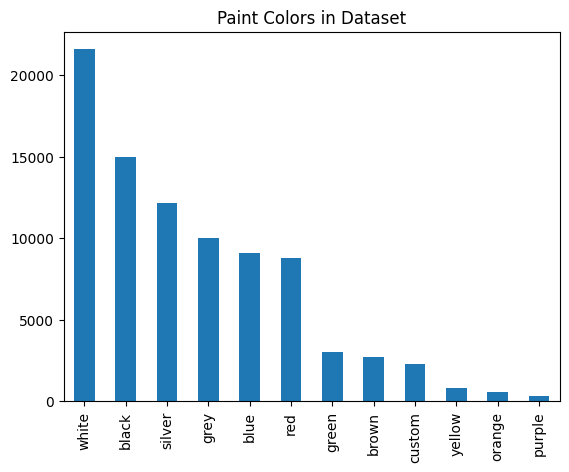

In [89]:
# Color of Cars in Dataset
print(EDA_data.paint_color.describe())
EDA_data['paint_color'].value_counts().sort_values(ascending=0).plot(kind='bar')
plt.title("Paint Colors in Dataset")

count     86309
unique       51
top          CA
freq       9273
Name: state, dtype: object


Text(0.5, 1.0, 'Top 30 State Listings in Dataset')

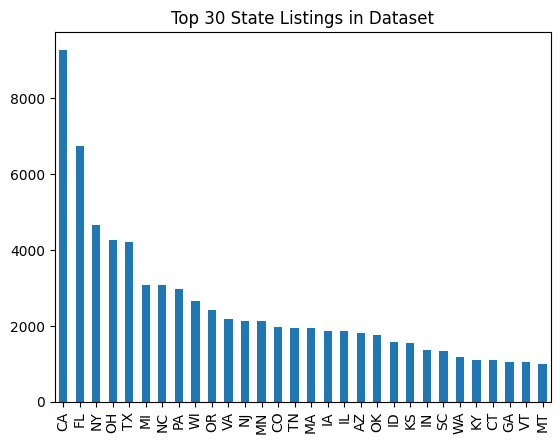

In [91]:
# States in Dataset
print(EDA_data.state.describe())
EDA_data['state'].value_counts().sort_values(ascending=0)[:30].plot(kind='bar')
plt.title("Top 30 State Listings in Dataset")

In [96]:
# Income statistics in Data
print(EDA_data.income_this_year.describe())

count    85786.000000
mean     65868.049134
std      13139.164673
min      45881.000000
25%      56494.000000
50%      62270.000000
75%      76614.000000
max      96477.000000
Name: income_this_year, dtype: float64


In [143]:
# Prices in data to understand what clipping we need
print(EDA_data.price.describe())

count    8.630900e+04
mean     1.183463e+05
std      1.839753e+07
min      0.000000e+00
25%      4.950000e+03
50%      9.000000e+03
75%      1.790000e+04
max      3.736929e+09
Name: price, dtype: float64




One-hotted Data and Models



In [117]:
# One-hotted data for most relevant results
one_hot_data = pd.read_csv('Demo_and_EDA_model_code/one_hotted_training_data.csv')
one_hot_data

,price,year,odometer,posting_date,income_this_year,manufactureracura,manufactureralfa.romeo,manufactureraston.martin,manufactureraudi,manufacturerbmw,...,paint_colorbrown,paint_colorcustom,paint_colorgreen,paint_colorgrey,paint_colororange,paint_colorpurple,paint_colorred,paint_colorsilver,paint_colorwhite,paint_coloryellow
0,15000.0,2013,128000,2021,49769,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19900.0,2004,88000,2021,49769,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14000.0,2012,95000,2021,49769,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,22500.0,2001,144700,2021,49769,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,15000.0,2017,90000,2021,49769,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82165,18000.0,2005,130000,2021,59626,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82166,18000.0,1990,114400,2021,59626,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82167,9800.0,1985,115000,2021,59626,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
82168,6800.0,1997,69550,2021,59626,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [144]:
# Compare price statistics of one-hotted data to original dataset
print(one_hot_data.price.describe())

count    8.217000e+04
mean     1.242435e+05
std      1.885518e+07
min      1.000000e+00
25%      5.450000e+03
50%      9.800000e+03
75%      1.800000e+04
max      3.736929e+09
Name: price, dtype: float64
